In [2]:
import re
import torch
from torch.utils.data import DataLoader, Dataset
import random
import numpy as np
import pandas as pd
from torch.nn.utils.rnn import pad_sequence
import platform
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from sklearn.model_selection import KFold

# Dropout
Dropout을 적용하고 싶은 레이어 전에 Dropout을 넣어줘야 함<br>
train시에는 꺼지지 않은 값이 2배가 됨

In [3]:
x = torch.Tensor([[1,2,3,4], [4,5,6,7]])
nn.Dropout(0.5).forward(x)

tensor([[ 2.,  0.,  6.,  8.],
        [ 8., 10.,  0.,  0.]])

# nn.CrossEntropyLoss()
logsoftmax + nllloss이기 때문에 모델 안에 softmax레이어를 넣을 필요 없음<br>
target은 long이어야 하고 input은 데이터 개수 x output_dim(=카테고리개수)여야 함<br>
output은 데이터개수 차원이고 안의 내용은 카테고리 숫자여야함 <br>

In [4]:
>>> loss = nn.CrossEntropyLoss()
>>> input = torch.randn(3, 5, requires_grad=True)
>>> target = torch.empty(3, dtype=torch.long).random_(5)
>>> output = loss(input, target)
>>> output.backward()

In [5]:
target.shape, input.shape

(torch.Size([3]), torch.Size([3, 5]))

# inplace operation

In [6]:
x.add_(1)
x

tensor([[2., 3., 4., 5.],
        [5., 6., 7., 8.]])

# repeat

In [7]:
>>> x = torch.tensor([1, 2, 3])
>>> x.repeat(4, 2)

tensor([[1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3],
        [1, 2, 3, 1, 2, 3]])

# bmm
Performs a batch matrix-matrix product of matrices stored in input and mat2.

input and mat2 must be 3-D tensors each containing the same number of matrices.

In [8]:
>>> input = torch.randn(10, 3, 4)
>>> mat2 = torch.randn(10, 4, 5)
>>> res = torch.bmm(input, mat2)
>>> res.size()
torch.Size([10, 3, 5])

torch.Size([10, 3, 5])

In [9]:
from sacrebleu import sentence_bleu

In [17]:
sentence_bleu(['i love you'], ['i kill you'])

BLEU = 34.67 66.7/25.0/25.0/0.0 (BP = 1.000 ratio = 1.000 hyp_len = 3 ref_len = 3)

# maxout

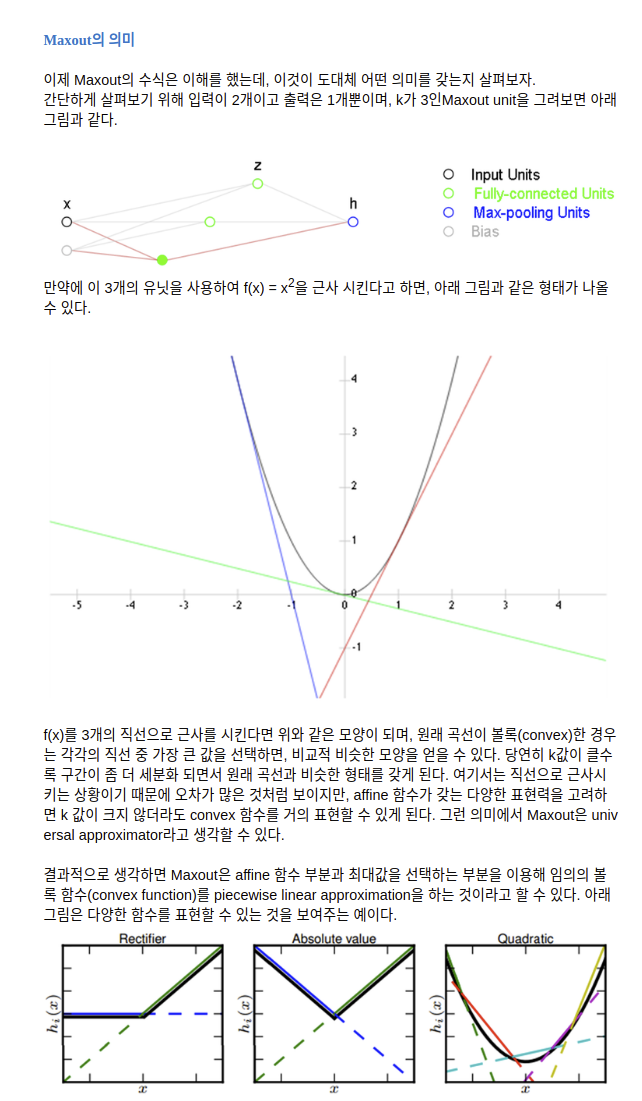

In [459]:
from torch import nn
from torch.nn import MSELoss
import torch

In [460]:
class fcn(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.4)
        self.relu = nn.ReLU()

    def forward(self, src):
        output = self.linear(src)
        output = self.relu(output)
        output = self.output(output)
        return output
        return output.values

In [461]:
model = fcn(1, 500, 1)
loss = nn.MSELoss()

In [462]:
for _ in range(1000):
    x = torch.FloatTensor(200, 1).uniform_(-30, 30) # batch size, input_dim
    y = x ** 2
    output = torch.sum((model(x) - y) ** 2) 
    output.backward()

In [463]:
xx = torch.range(-20, 20, 1)
yy = model(xx.unsqueeze(1))

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


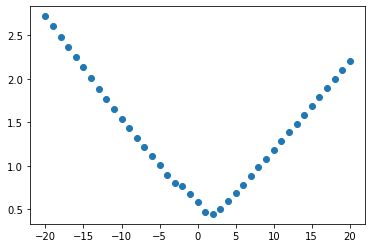

In [464]:
plt.scatter(xx, yy.data)

In [581]:
class maxout(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(0.4)
        self.relu = nn.ReLU()

    def forward(self, src):
        src = self.dropout(src)
        output = self.linear(src)
#         output = self.relu(output)
        output = torch.max(output, dim=1) 
        return output.values

In [584]:
model = maxout(1, 500)
loss = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-7)

In [585]:
for _ in range(10000):
    optim.zero_grad()
    x = torch.FloatTensor(2000, 1).uniform_(-30, 30) # batch size, input_dim
    y = x ** 2
    output = loss(model(x), y)
    output.backward()
    optim.step()

In [586]:
xx = torch.range(-20, 20, 0.01)

/home/long8v/anaconda3/envs/long36v/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """Entry point for launching an IPython kernel.


In [587]:
yy = model(xx.unsqueeze(1))

In [588]:
import matplotlib.pyplot as plt

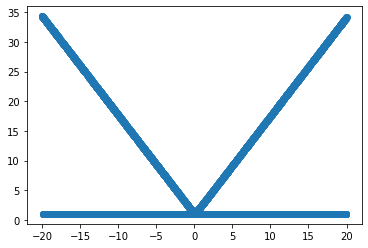

In [589]:
plt.scatter(xx, yy.data)